In [1]:
import pandas as pd

# Load the dataset from the specified path
file_path = r'C:\Users\SHIVA\Downloads\archive\news.csv'
df = pd.read_csv(file_path)

# Display the first few rows to inspect the data
print("Initial Dataset:")
print(df.head())

# Your cleaning code here...
# For example:
# Handle Missing Values
# Correct Data Types
# Text Data Cleaning
# Save the cleaned dataset


Initial Dataset:
   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [2]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\SHIVA\Downloads\archive\news.csv'
df = pd.read_csv(file_path)

# Drop the 'Unnamed: 0' column as it seems to be an unnecessary index
df.drop(columns=['Unnamed: 0'], inplace=True)

# Handle missing values (if any)
df.dropna(inplace=True)

# Remove empty rows where both 'title' and 'text' columns are empty
df = df[(df['title'].str.strip() != '') | (df['text'].str.strip() != '')]

# Convert 'label' column to binary numeric values (if needed)
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})

# Text Data Cleaning (for 'title' and 'text' columns)
# Example: Removing special characters, converting text to lowercase
df['clean_title'] = df['title'].str.replace('[^a-zA-Z\s]', '').str.lower()
df['clean_text'] = df['text'].str.replace('[^a-zA-Z\s]', '').str.lower()

# Display the cleaned dataset
print("Cleaned Dataset:")
print(df.head())

# Save the cleaned dataset
cleaned_file_path = r'C:\Users\SHIVA\Downloads\archive\cleaned_news.csv'
df.to_csv(cleaned_file_path, index=False)


C:\Users\SHIVA\AppData\Local\Temp\ipykernel_9532\1239011430.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_title'] = df['title'].str.replace('[^a-zA-Z\s]', '').str.lower()
C:\Users\SHIVA\AppData\Local\Temp\ipykernel_9532\1239011430.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['text'].str.replace('[^a-zA-Z\s]', '').str.lower()


Cleaned Dataset:
                                               title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text  label  \
0  Daniel Greenfield, a Shillman Journalism Fello...      0   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...      0   
2  U.S. Secretary of State John F. Kerry said Mon...      1   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...      0   
4  It's primary day in New York and front-runners...      1   

                                         clean_title  \
0                        you can smell hillarys fear   
1  watch the exact moment paul ryan committed pol...   
2        kerry to go to paris in gesture of sympathy   
3  bernie supporters on twitter erupt in an

# Naive Bayes classifier

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = r'C:\Users\SHIVA\Downloads\archive\news.csv'
data = pd.read_csv(file_path)

# Assuming the dataset has 'text' as the column containing textual data and 'category' as the target variable

# Splitting the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Training data
train_texts = train_data['text']
train_labels = train_data['label']

# Testing data
test_texts = test_data['text']
test_labels = test_data['label']

# Vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

# Initialize Naive Bayes classifier
naive_bayes = MultinomialNB()

# Train the classifier on the training data
naive_bayes.fit(X_train, train_labels)

# Predict on the testing data
predictions = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.898973954222573


In [4]:
print(data.columns)


Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


# Decision Tree

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = r'C:\Users\SHIVA\Downloads\archive\news.csv'
data = pd.read_csv(file_path)

# Splitting the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Training data
train_texts = train_data['text']
train_labels = train_data['label']

# Testing data
test_texts = test_data['text']
test_labels = test_data['label']

# Vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train the classifier on the training data
decision_tree.fit(X_train, train_labels)

# Predict on the testing data
predictions = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)

print("Accuracy:", accuracy)


Accuracy: 0.7971586424625099


# Random Forest classifier

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = r'C:\Users\SHIVA\Downloads\archive\news.csv'
data = pd.read_csv(file_path)

# Splitting the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Training data
train_texts = train_data['text']
train_labels = train_data['label']

# Testing data
test_texts = test_data['text']
test_labels = test_data['label']

# Vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

# Initialize Random Forest classifier
random_forest = RandomForestClassifier()

# Train the classifier on the training data
random_forest.fit(X_train, train_labels)

# Predict on the testing data
predictions = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)

print("Accuracy:", accuracy)


Accuracy: 0.8918705603788477


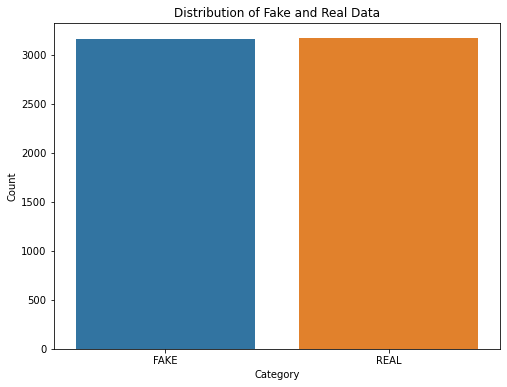

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\SHIVA\Downloads\archive\news.csv'
data = pd.read_csv(file_path)

# Plotting the count of each category
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Fake and Real Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [9]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\SHIVA\Downloads\archive\news.csv'
data = pd.read_csv(file_path)

# Count the number of rows for each category
category_counts = data['label'].value_counts()

# Print the counts
print("Number of real news rows:", category_counts['REAL'])
print("Number of fake news rows:", category_counts['FAKE'])


Number of real news rows: 3171
Number of fake news rows: 3164


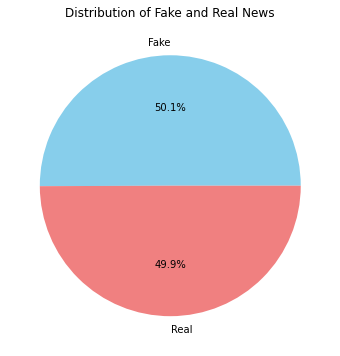

Number of real news rows: 3171
Number of fake news rows: 3164


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\SHIVA\Downloads\archive\news.csv'
data = pd.read_csv(file_path)

# Count the number of rows for each category
category_counts = data['label'].value_counts()

# Plotting the count of each category
plt.figure(figsize=(8, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], labels=['Fake', 'Real'])
plt.title('Distribution of Fake and Real News')
plt.ylabel('')
plt.show()

# Print the counts
print("Number of real news rows:", category_counts['REAL'])
print("Number of fake news rows:", category_counts['FAKE'])

